<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on practice lab: Model Development**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired in throughout the module, and use linear regression principles to create a model that predicts the Price of the laptop, based on one or more attributes of the dataset.


# Objectives

After completing this lab you will be able to:

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [35]:
# import piplite
# await piplite.install('skillsnetwork')
# await piplite.install('seaborn')
# import skillsnetwork

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Importing the dataset
Run the cell below to download the dataset into this environment.


In [37]:
#This function will download the dataset into your browser 

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
# await skillsnetwork.download(filepath,'./laptops.csv')
# path = './laptops.csv'

Load the dataset into a pandas dataframe


In [38]:
df = pd.read_csv(path, header=0)

# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [39]:
# Write your code below and press Shift+Enter to execute 
lm1 = LinearRegression()
X, y = df[['CPU_frequency']], df[['Price']]
lm1.fit(X, y)
lm1.coef_, lm1.intercept_

(array([[1485.19362648]]), array([253.66117069]))

<details>
    <summary>Click here for Solution</summary>

```python
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)
```

</details>


Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


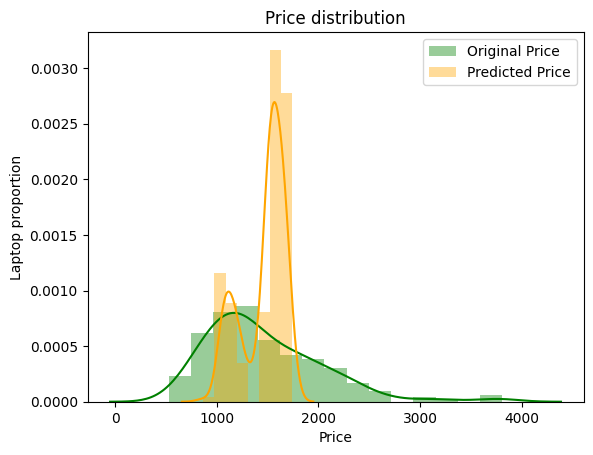

In [56]:
# Write your code below and press Shift+Enter to execute 
yhat1 = lm1.predict(X)
ax1 = sns.distplot(y, hist=True, color='green', label='Original Price')
sns.distplot(yhat1, hist=True, color='orange', label='Predicted Price', ax=ax1)
plt.title('Price distribution')
plt.ylabel('Laptop proportion')
plt.xlabel('Price')
plt.legend()
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()
```

</details>


Evaluate the Mean Squared Error and R^2 score values for the model. 


In [54]:
# Write your code below and press Shift+Enter to execute 
mean_squared_error(y, yhat1)

284583.4405868629

In [55]:
r2_score(y, yhat1)

0.1344436321024326

In [53]:
r2_score(y, yhat1) == lm1.score(X, y)

True

<details>
    <summary>Click here for Solution</summary>

```python
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)
```

</details>


# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 


In [61]:
# Write your code below and press Shift+Enter to execute 
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
lm2 = LinearRegression()
lm2.fit(Z, y)

LinearRegression()

In [62]:
lm2.coef_, lm2.intercept_

(array([[ 9.61283977e+02,  8.68089292e+01,  3.94604825e-01,
          6.56633979e+01, -4.27445318e+02,  9.78000871e+01,
          1.91295466e+02]]),
 array([-841.99132591]))

<details>
    <summary>Click here for Solution</summary>

```python
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)
```

</details>


Plot the Distribution graph of the predicted values as well as the Actual values


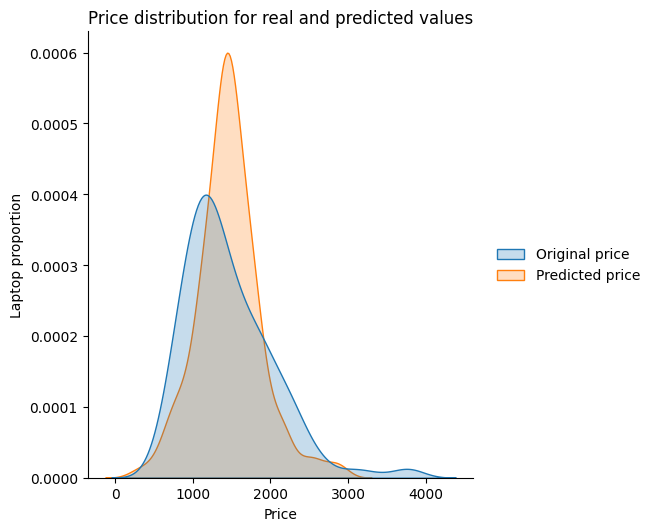

In [86]:
# Write your code below and press Shift+Enter to execute
yhat2 = lm2.predict(Z)
combined_data = pd.DataFrame({'Original price': df['Price'], 
                              'Predicted price': yhat2.flatten()})
sns.displot(data=combined_data, kind='kde', fill=True)
ax3 = plt.gca()
ax3.set_title('Price distribution for real and predicted values')
ax3.set_xlabel('Price')
ax3.set_ylabel('Laptop proportion')
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

```

</details>


Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [87]:
# Write your code below and press Shift+Enter to execute
mean_squared_error(y, yhat2)

161680.57263893104

In [89]:
r2_score(y, yhat2)

0.5082509055187376

<details>
    <summary>Click here for Solution</summary>

```python
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
```

</details>


# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 


In [91]:
#  Write your code below and press Shift+Enter to execute
f1 = np.polyfit(df['CPU_frequency'], df['Price'], deg=3)
f2 = np.polyfit(df['CPU_frequency'], df['Price'], deg=9)
f3 = np.polyfit(df['CPU_frequency'], df['Price'], deg=27)

p1 = np.poly1d(f1)
p2 = np.poly1d(f2)
p3 = np.poly1d(f3)

print(p1)
print('------------')
print(p2)
print('------------')
print(p3)

           3             2
3.409e+04 x - 6.574e+04 x + 4.129e+04 x - 7238
------------
            9             8             7             6             5
-5.664e+10 x + 3.875e+11 x - 1.169e+12 x + 2.041e+12 x - 2.271e+12 x
              4             3             2
 + 1.669e+12 x - 8.095e+11 x + 2.498e+11 x - 4.448e+10 x + 3.478e+09
------------
            27             26             25             24
-1.979e+08 x  + 1.853e+08 x  + 1.793e+08 x  + 4.033e+07 x 
              23             22             21             20
 - 8.557e+07 x  - 1.375e+08 x  - 1.131e+08 x  - 4.234e+07 x 
              19             18             17             16
 + 3.479e+07 x  + 8.522e+07 x  + 9.288e+07 x  + 6.117e+07 x 
              15             14             13             12
 + 8.726e+06 x  - 3.957e+07 x  - 6.311e+07 x  - 5.402e+07 x 
             11            10             9             8             7
 - 2.03e+07 x  + 1.82e+07 x  + 3.988e+07 x + 3.364e+07 x + 6.452e+06 x
              6  

<details>
    <summary>Click here for Solution</summary>

```python
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)
```

</details>


Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [12]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


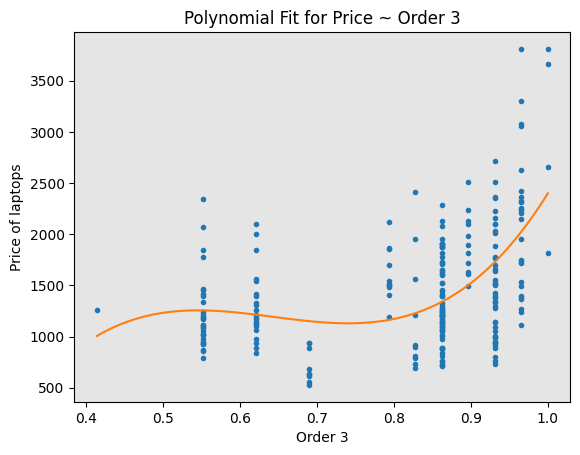

In [93]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 3
PlotPolly(p1, df['CPU_frequency'], df['Price'], 'Order 3')

<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p1, X, Y, 'CPU_frequency')
```

</details>


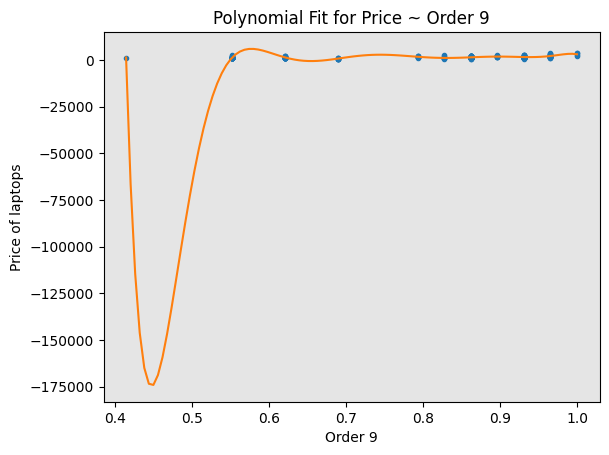

In [96]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 9
PlotPolly(p2, df['CPU_frequency'], df['Price'], 'Order 9')

<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p3, X, Y, 'CPU_frequency')
```

</details>


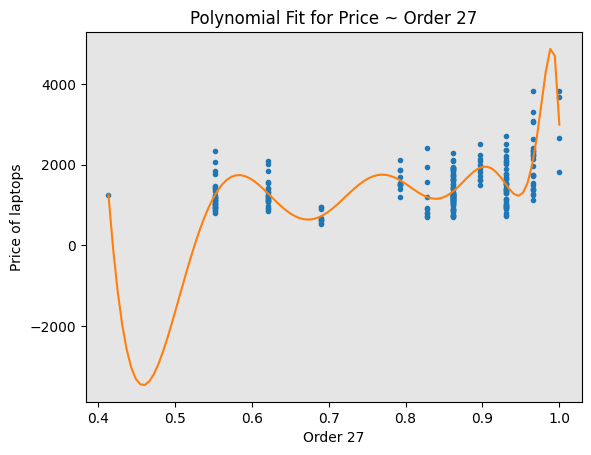

In [97]:
#  Write your code below and press Shift+Enter to execute
# Call for function of degree 27
PlotPolly(p3, df['CPU_frequency'], df['Price'], 'Order 27')

<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p5, X, Y, 'CPU_frequency')
```

</details>


Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [100]:
#  Write your code below and press Shift+Enter to execute
# Degree 3
y_true = df['Price']
x = df['CPU_frequency']
mean_squared_error(y_true, p1(x)), r2_score(y_true, p1(x))

(241024.86303848782, 0.26692640796531075)

In [102]:
# Degree 9
mean_squared_error(y_true, p2(x)), r2_score(y_true, p2(x))

(202311.2151607396, 0.38467340117063487)

In [103]:
# Degree 27
mean_squared_error(y_true, p3(x)), r2_score(y_true, p3(x))

(199541.5873146357, 0.3930971837138427)

<details>
    <summary>Click here for Solution</summary>
    
```python
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))
```

</details>


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 


In [118]:
#  Write your code below and press Shift+Enter to execute
pipe = Pipeline(steps=[('scale', StandardScaler()),
                       ('poly_feat', PolynomialFeatures(5)),
                       ('lreg', LinearRegression())])
pipe.fit(Z.astype(float), df['Price'])

Pipeline(steps=[('scale', StandardScaler()),
                ('poly_feat', PolynomialFeatures(degree=5)),
                ('lreg', LinearRegression())])

In [120]:
y_pipe = pipe.predict(Z.astype(float))

<details>
    <summary>Click here for Solution</summary>
    
```python
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
```

</details>


Evaluate the MSE and R^2 values for the this predicted output.


In [121]:
#  Write your code below and press Shift+Enter to execute
pipe.score(Z, df['Price']), mean_squared_error(df['Price'], y_pipe)

(0.8086007088399448, 62929.54546278754)

<details>
    <summary>Click here for Solution</summary>
    
```python
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

```

</details>


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
